### Peizhao's Jupyter NB: Arrest in Neighborhoods

Source: https://data.wprdc.org/dataset/arrest-data. My partner and I want to live in a safe place. I use the arrest data to analyze which neighborhood is relatively safe. However, small neighborhoods with few population have low arrest incidents that affect the analysis. Thus, the final result only analyze the major neighborhood in Pittsburgh city. 

In [2]:
#import
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
#read file
arrest = pd.read_csv("Arrest report.csv")
population = pd.read_csv("population.csv")
arrest["INCIDENTNEIGHBORHOOD"]

0                       Bloomfield
1                     Outside City
2                         Westwood
3                   East Allegheny
4                  Crafton Heights
                   ...            
61225    Central Business District
61226                    Arlington
61227           Central North Side
61228                 West Oakland
61229                      Windgap
Name: INCIDENTNEIGHBORHOOD, Length: 61230, dtype: object

In [21]:
#create dictionary
myDict = dict()
for i in range(len(arrest)):
    temp = arrest.loc[i, "INCIDENTNEIGHBORHOOD"]
    if(temp not in myDict):
        myDict[temp] = 1
    else:
        myDict[temp] +=1

for keys in myDict:
    for x in range(len(population)):
        if keys == population.loc[x]["Neighborhood"]:
            myDict[keys] = (myDict[keys] / population.loc[x]["2020_Total_Population"])

0.06272509003601441

In [11]:
#convert to series
arrestSeries = pd.Series(myDict, name = "Fields")
arrestSeries

929

In [7]:
#Get the first 30 to exclude small neighborhoods.
SeriesInOrder = arrestSeries.sort_values(ascending=False).head(30)
#Arrange in ascending order.
SeriesInOrder = SeriesInOrder.sort_values(ascending=True)
SeriesInOrder

Crawford-Roberts              768
Squirrel Hill South           771
Fineview                      773
Central North Side            782
Larimer                       810
Middle Hill                   880
Allentown                     884
Shadyside                     898
Bloomfield                    929
Perry South                   989
Brighton Heights             1024
East Hills                   1083
Beechview                    1115
Allegheny Center             1180
Sheraden                     1191
Lincoln-Lemington-Belmar     1216
Knoxville                    1240
Brookline                    1266
Hazelwood                    1287
Mount Washington             1353
Bluff                        1370
Marshall-Shadeland           1402
East Liberty                 1733
Homewood North               1837
Homewood South               1939
East Allegheny               2008
Carrick                      2198
NaN                          2325
South Side Flats             3185
Central Busine

<Axes: >

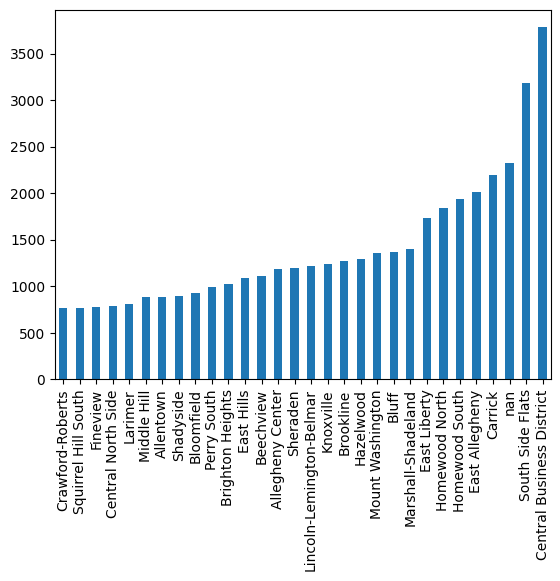

In [8]:
#Plot
SeriesInOrder.plot.bar()